In [9]:
# Step 1: Import pandas
import pandas as pd

# Step 2: Read both datasets
top_1000_df = pd.read_excel("Top_1000_Highest_Grossing_Movies_Of_All_Time.xlsx", sheet_name="Top_1000_Highest_Grossing_Movie")
top_100_df = pd.read_excel("imdb_top100_raw_data.xlsx", sheet_name="Sheet1")

# Step 3: Clean key columns for consistency
top_1000_df['Movie Title'] = top_1000_df['Movie Title'].str.strip().str.lower()
top_100_df['Movie Title'] = top_100_df['Movie Title'].str.strip().str.lower()

top_1000_df['Year of Release'] = top_1000_df['Year of Release'].astype(str).str.strip()
top_100_df['Year of Release'] = top_100_df['Year of Release'].astype(str).str.strip()

# Step 4: Perform inner join on cleaned columns
merged_df = pd.merge(
    top_100_df,
    top_1000_df,
    on=['Movie Title', 'Year of Release'],
    how='inner'
)

# Step 5: Inspect the columns to verify renaming
print("Merged dataset columns:", merged_df.columns)

# Step 6: Select the correct version of 'Metascore'
# Assuming Metascore_x is from the Top 100 dataset
final_columns = [
    "Movie Title", "Year of Release", "Duration_x", "Metascore_x", "Star Rating",
    "Genre", "Gross", "Worldwide LT Gross"
]

# Rename columns for clarity
final_df = merged_df[final_columns].rename(columns={
    "Duration_x": "Duration",
    "Metascore_x": "Metascore",
    "Star Rating": "IMDb Rating"
})

# Step 7: Save the cleaned dataset
final_df.to_csv("cleaned_top_100_movies1.csv", index=False)

# Step 8: Verify the output
display(final_df.head())
print("Final dataset shape:", final_df.shape)



Merged dataset columns: Index(['Movie Title', 'Year of Release', 'Runtime ', 'Duration_x',
       'Star Rating', 'Metascore_x', 'Genre', 'Movie Rating', 'Duration_y',
       'Gross', 'Worldwide LT Gross', 'Metascore_y', 'Votes', 'Logline'],
      dtype='object')


,Movie Title,Year of Release,Duration,Metascore,IMDb Rating,Genre,Gross,Worldwide LT Gross
0,the godfather,1972,175,100.0,9.2,"Crime,Drama",$134.97M,250341816
1,the dark knight,2008,152,84.0,9.0,"Action,Crime,Drama",$534.86M,1006102277
2,schindler's list,1993,195,95.0,9.0,"Biography,Drama,History",$96.90M,322161245
3,the lord of the rings: the return of the king,2003,201,94.0,9.0,"Action,Adventure,Drama",$377.85M,1146436214
4,the lord of the rings: the fellowship of the ring,2001,178,92.0,8.9,"Action,Adventure,Drama",$315.54M,898094742


Final dataset shape: (35, 8)


##  Exploratory Data Analysis 

<Axes: title={'center': 'Top 10 Movies by Worldwide Gross Revenue'}, xlabel='Movie Title'>

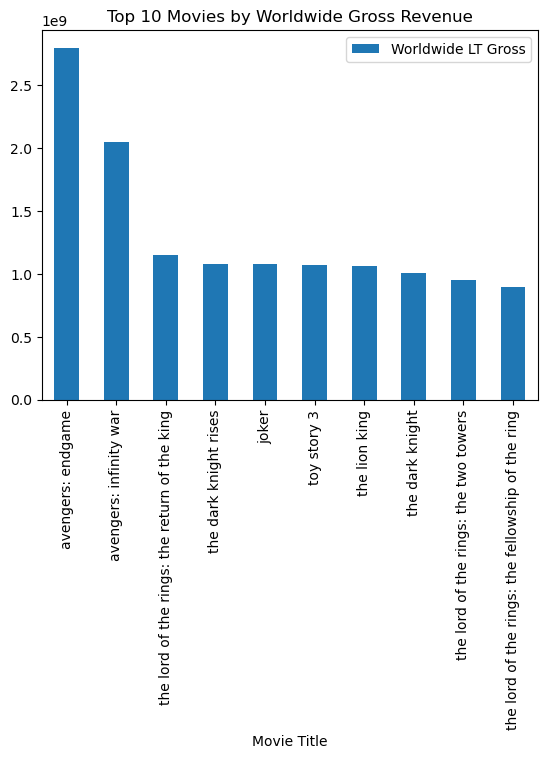

In [10]:
#Sort dataset by the Worldwide LT Gross column in descending order.
#Top 10 Movies on the bar chart
top_10_movies = final_df.sort_values(by="Worldwide LT Gross", ascending=False).head(10)
top_10_movies.plot(kind='bar', x="Movie Title", y="Worldwide LT Gross", title="Top 10 Movies by Worldwide Gross Revenue")


<Axes: title={'center': 'Distribution of Metascores'}, ylabel='Frequency'>

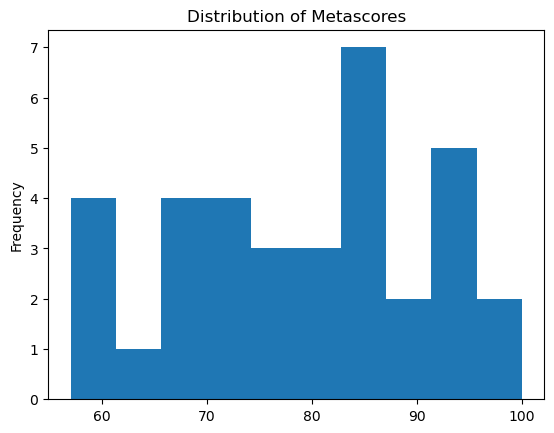

In [12]:
#Distribution of Metascores
final_df['Metascore'].plot(kind='hist', bins=10, title="Distribution of Metascores")


<Axes: title={'center': 'Distribution of IMDb Ratings'}, ylabel='Frequency'>

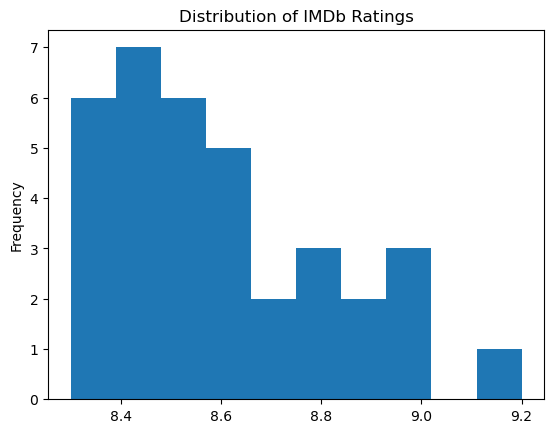

In [13]:
#Distribution of IMDb Ratings
final_df['IMDb Rating'].plot(kind='hist', bins=10, title="Distribution of IMDb Ratings")

<Axes: title={'center': 'Revenue Trends Over Time (by Decade)'}, xlabel='Decade'>

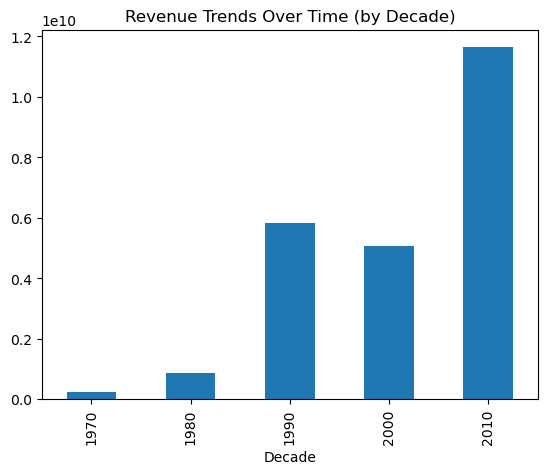

In [14]:
#Revenue Trends Over Time by Decade

final_df['Decade'] = (final_df['Year of Release'].astype(int) // 10) * 10
revenue_by_decade = final_df.groupby('Decade')['Worldwide LT Gross'].sum()
revenue_by_decade.plot(kind='bar', title="Revenue Trends Over Time (by Decade)")


# Research Questions

## #1 Is there a correlation between IMDb Ratings and Box Office Revenue?

Correlation between IMDb Rating and Worldwide LT Gross: -0.07564617941463062


<Axes: title={'center': 'IMDb Ratings vs Box Office Revenue'}, xlabel='IMDb Rating', ylabel='Worldwide LT Gross'>

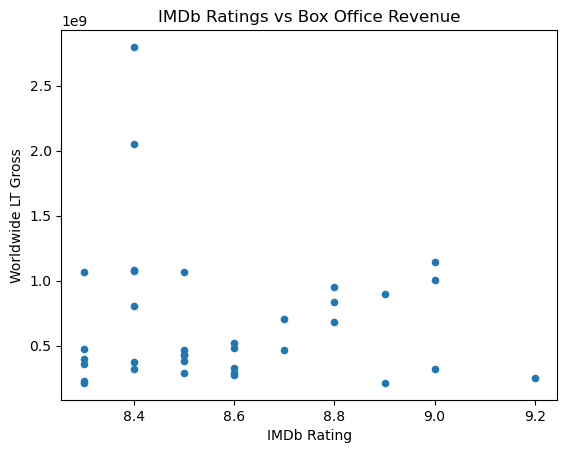

In [15]:
# Scatter plot with IMDb Rating on the x-axis and Worldwide LT Gross on the y-axis

correlation = final_df['IMDb Rating'].corr(final_df['Worldwide LT Gross'])
print("Correlation between IMDb Rating and Worldwide LT Gross:", correlation)
final_df.plot(kind='scatter', x="IMDb Rating", y="Worldwide LT Gross", title="IMDb Ratings vs Box Office Revenue")


Correlation between IMDb Rating and Worldwide LT Gross (No Outliers): 0.13858727849446034


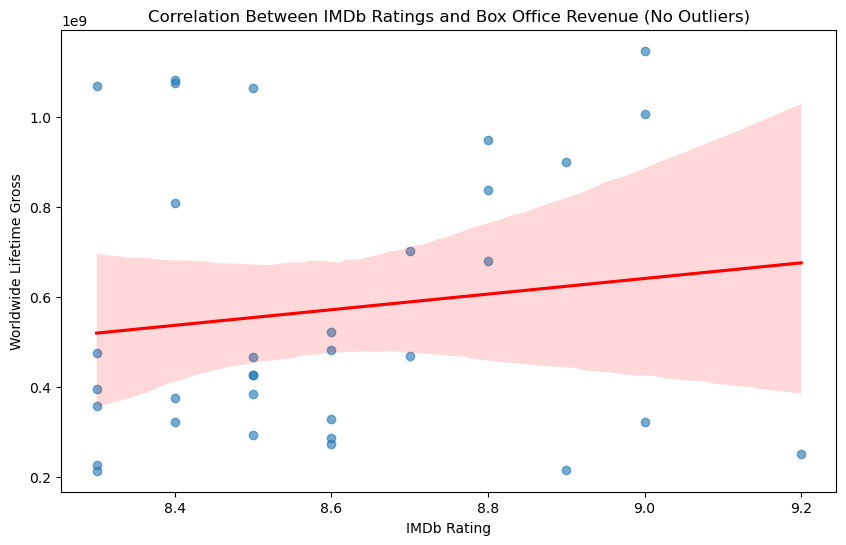

In [24]:
# Scatter plot with regression line between IMDb rating and Worldwide LT Gross -- with no outliers 

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Calculate IQR for 'Worldwide LT Gross'
Q1 = final_df['Worldwide LT Gross'].quantile(0.25)
Q3 = final_df['Worldwide LT Gross'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define a threshold to remove outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter the dataset to exclude outliers
filtered_df = final_df[(final_df['Worldwide LT Gross'] >= lower_bound) & 
                       (final_df['Worldwide LT Gross'] <= upper_bound)]

filtered_correlation = filtered_df['IMDb Rating'].corr(filtered_df['Worldwide LT Gross'])
print("Correlation between IMDb Rating and Worldwide LT Gross (No Outliers):", filtered_correlation)

# Step 4: Plot the filtered scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='IMDb Rating', y='Worldwide LT Gross', data=filtered_df, 
            scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Correlation Between IMDb Ratings and Box Office Revenue (No Outliers)')
plt.xlabel('IMDb Rating')
plt.ylabel('Worldwide Lifetime Gross')
plt.show()



## What is the relationship between Metascore and IMDb Star Ratings?

Correlation between Metascore and IMDb Rating: 0.4537813010400114


<Axes: title={'center': 'Metascore vs IMDb Rating'}, xlabel='Metascore', ylabel='IMDb Rating'>

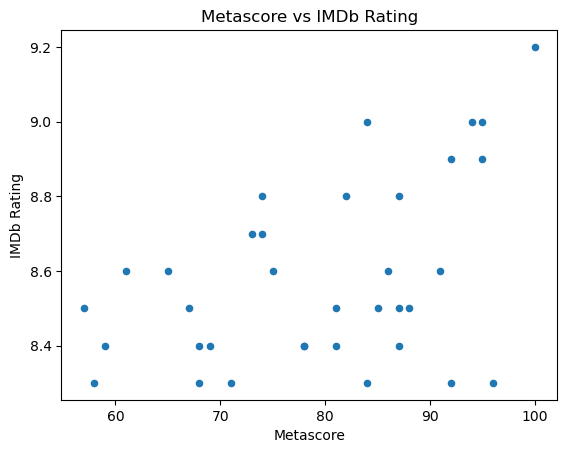

In [16]:
# Scatter plot with Metascore on the x-axis and IMDb Rating on the y-axis
correlation = final_df['Metascore'].corr(final_df['IMDb Rating'])
print("Correlation between Metascore and IMDb Rating:", correlation)
final_df.plot(kind='scatter', x="Metascore", y="IMDb Rating", title="Metascore vs IMDb Rating")


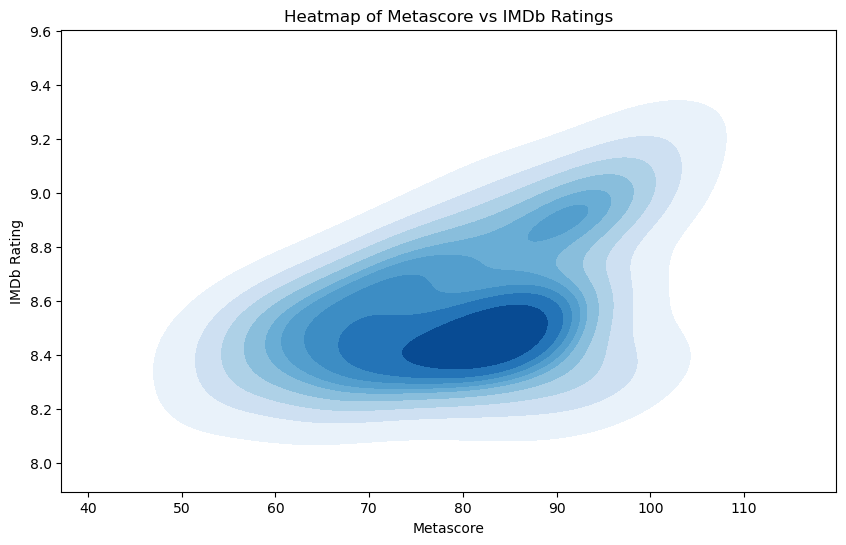

In [20]:
# Create a heatmap to show density between Metascore and IMDb Rating
plt.figure(figsize=(10, 6))
sns.kdeplot(x='Metascore', y='IMDb Rating', data=final_df, cmap='Blues', fill=True)
plt.title('Heatmap of Metascore vs IMDb Ratings')
plt.xlabel('Metascore')
plt.ylabel('IMDb Rating')
plt.show()


## Does a higher IMDb Star Rating translate to a higher Lifetime Gross?

<Axes: title={'center': 'Average Revenue by IMDb Rating Band'}, xlabel='Rating Band'>

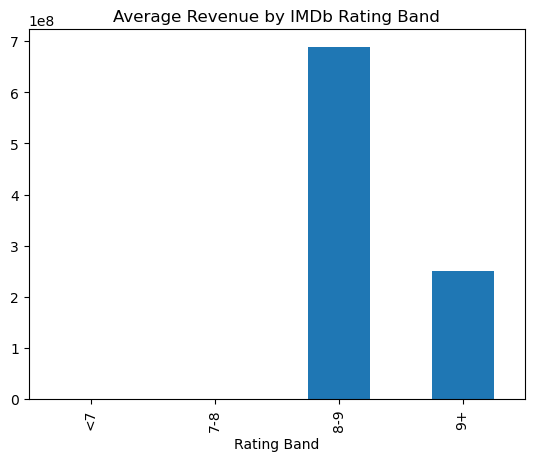

In [17]:
# Group movies by these rating bands and calculate the average Worldwide LT Gross for each group
# Bar chart showing average revenue for each IMDb rating band
bins = [0, 7, 8, 9, 10]
labels = ["<7", "7-8", "8-9", "9+"]
final_df['Rating Band'] = pd.cut(final_df['IMDb Rating'], bins=bins, labels=labels)
avg_revenue = final_df.groupby('Rating Band')['Worldwide LT Gross'].mean()
avg_revenue.plot(kind='bar', title="Average Revenue by IMDb Rating Band")


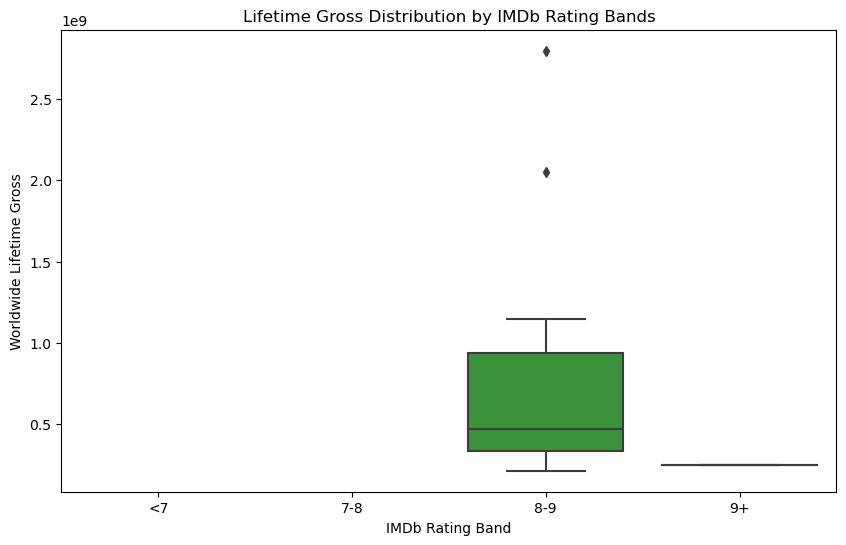

In [21]:
# Boxplot of Revenue by IMDb Rating Bands
# Shows the distribution (median, spread, and outliers) of Worldwide LT Gross across different IMDb rating bands

# Create IMDb Rating bands
bins = [0, 7, 8, 9, 10]
labels = ['<7', '7-8', '8-9', '9+']
final_df['Rating Band'] = pd.cut(final_df['IMDb Rating'], bins=bins, labels=labels)

# Boxplot to show revenue distribution for each rating band
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rating Band', y='Worldwide LT Gross', data=final_df)
plt.title('Lifetime Gross Distribution by IMDb Rating Bands')
plt.xlabel('IMDb Rating Band')
plt.ylabel('Worldwide Lifetime Gross')
plt.show()


In [26]:
final_df.to_csv("final_cleaned_dataset.csv", index=False)
